# Load Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Read Data

In [2]:
# Create list of files to readb
data_files_list = [
    'MERGED1996_97_PP.csv',
    'MERGED1997_98_PP.csv',
    'MERGED1998_99_PP.csv',
    'MERGED1999_00_PP.csv',
    'MERGED2000_01_PP.csv',
    'MERGED2001_02_PP.csv',
    'MERGED2002_03_PP.csv',
    'MERGED2003_04_PP.csv',
    'MERGED2004_05_PP.csv',
    'MERGED2005_06_PP.csv',
    'MERGED2006_07_PP.csv',
    'MERGED2007_08_PP.csv',
    'MERGED2008_09_PP.csv',
    'MERGED2009_10_PP.csv',
    'MERGED2010_11_PP.csv',
    'MERGED2011_12_PP.csv',
    'MERGED2012_13_PP.csv',
    'MERGED2013_14_PP.csv',
    'MERGED2014_15_PP.csv',
    'MERGED2015_16_PP.csv',
    'MERGED2016_17_PP.csv'
]

# Initiate Empty Dictionary
college_enrollment_dict = {
    'year': [],
    'total_colleges': [],
    'total_community_colleges': [],
    'mean_college_enrollment': [],
    'mean_community_college_enrollment': [],
    'std_college_enrollment': [],
    'std_community_college_enrollment': [],
    'mean_average_age_of_entry_all_colleges': [],
    'mean_average_age_of_entry_community_colleges': [],
    'std_average_age_of_entry_all_colleges': [],
    'std_average_age_of_entry_community_colleges': [],
    'mean_average_part_time_students_all_colleges': [],
    'mean_average_part_time_students_community_colleges': [],
    'std_average_part_time_students_all_colleges': [],
    'std_average_part_time_students_community_colleges': []
}

In [3]:
# Calculate fields for each field in college_enrollment_dict for each year

year = 1996
for file in data_files_list:
    college_data_df = pd.read_csv('data/' + file, dtype=str)
    college_data_df.loc[college_data_df['AGE_ENTRY']=='PrivacySuppressed', 'AGE_ENTRY'] = np.nan
    california_college_data_df = college_data_df[college_data_df['STABBR']=='CA']
    community_college_data_df = college_data_df[
        (college_data_df['CONTROL']=='1') & 
        (college_data_df['PREDDEG'] != '3') & 
        (college_data_df['PREDDEG'] != '4')
    ]
    california_community_college_df = community_college_data_df[community_college_data_df['STABBR']=='CA']
    
    # Year
    college_enrollment_dict['year'].append(year)
    
    # Count Colleges
    college_enrollment_dict['total_colleges'].append(college_data_df.shape[0])
    college_enrollment_dict['total_community_colleges'].append(community_college_data_df.shape[0])
    
    # Number of Enrollment 
    college_enrollment_dict['mean_college_enrollment'].append(college_data_df['UGDS'].astype(float).mean())
    college_enrollment_dict['mean_community_college_enrollment'].append(community_college_data_df['UGDS'].astype(float).mean())
    college_enrollment_dict['std_college_enrollment'].append(college_data_df['UGDS'].astype(float).std())
    college_enrollment_dict['std_community_college_enrollment'].append(community_college_data_df['UGDS'].astype(float).std())
    
    # Age of Entry
    college_enrollment_dict['mean_average_age_of_entry_all_colleges'].append(college_data_df['AGE_ENTRY'].astype(float).mean())
    college_enrollment_dict['mean_average_age_of_entry_community_colleges'].append(community_college_data_df['AGE_ENTRY'].astype(float).mean())
    college_enrollment_dict['std_average_age_of_entry_all_colleges'].append(college_data_df['AGE_ENTRY'].astype(float).std())
    college_enrollment_dict['std_average_age_of_entry_community_colleges'].append(community_college_data_df['AGE_ENTRY'].astype(float).std())
    
    # Part Time Share
    if year==2000:
        college_enrollment_dict['mean_average_part_time_students_all_colleges'].append(college_data_df['PPTUG_EF2'].astype(float).mean())
        college_enrollment_dict['mean_average_part_time_students_community_colleges'].append(community_college_data_df['PPTUG_EF2'].astype(float).mean())
        college_enrollment_dict['std_average_part_time_students_all_colleges'].append(college_data_df['PPTUG_EF2'].astype(float).std())
        college_enrollment_dict['std_average_part_time_students_community_colleges'].append(community_college_data_df['PPTUG_EF2'].astype(float).std())
    else:
        college_enrollment_dict['mean_average_part_time_students_all_colleges'].append(college_data_df['PPTUG_EF'].astype(float).mean())
        college_enrollment_dict['mean_average_part_time_students_community_colleges'].append(community_college_data_df['PPTUG_EF'].astype(float).mean())
        college_enrollment_dict['std_average_part_time_students_all_colleges'].append(college_data_df['PPTUG_EF'].astype(float).std())
        college_enrollment_dict['std_average_part_time_students_community_colleges'].append(community_college_data_df['PPTUG_EF'].astype(float).std())
        
    year += 1
    
college_enrollment_df = pd.DataFrame(college_enrollment_dict)

In [4]:
college_enrollment_df

,year,total_colleges,total_community_colleges,mean_college_enrollment,mean_community_college_enrollment,std_college_enrollment,std_community_college_enrollment,mean_average_age_of_entry_all_colleges,mean_average_age_of_entry_community_colleges,std_average_age_of_entry_all_colleges,std_average_age_of_entry_community_colleges,mean_average_part_time_students_all_colleges,mean_average_part_time_students_community_colleges,std_average_part_time_students_all_colleges,std_average_part_time_students_community_colleges
0,1996,6794,1503,1812.882965,2911.751687,3655.198875,3972.940724,NaN,NaN,NaN,NaN,0.243030,0.450702,0.250504,0.234557
1,1997,6699,1603,1748.487175,2587.653966,3574.557564,3697.242680,25.532047,26.450934,3.380931,2.395542,0.245507,0.450645,0.250496,0.231295
2,1998,6480,1522,1809.848019,2677.997372,3620.368825,3610.092230,25.678186,26.655331,3.538571,2.624436,0.243663,0.439091,0.250252,0.233476
3,1999,6466,1511,1874.508024,2841.137657,3718.471285,3805.841906,25.739926,26.704053,3.549226,2.679320,0.244859,0.447874,0.251244,0.236397
4,2000,6478,1561,NaN,NaN,NaN,NaN,25.856039,26.804977,3.641344,2.642469,0.258886,0.490219,0.265020,0.252380
5,2001,6619,1544,1894.593705,2837.314527,3806.365511,3906.875355,26.089521,27.022308,3.760805,2.648061,0.231145,0.433164,0.249714,0.235025
6,2002,6546,1537,2022.165039,3098.628045,3993.087604,4186.487588,26.150959,27.193707,3.708488,2.676801,0.232945,0.428472,0.245816,0.224909
7,2003,6585,1510,2077.375218,3218.502986,4096.007576,4330.762147,26.236449,27.190909,3.751860,2.714365,0.226235,0.423631,0.240704,0.217342
8,2004,6660,1495,2139.414416,3319.572690,4245.150978,4500.364293,26.168359,26.928786,3.750551,2.682770,0.220194,0.415519,0.236490,0.215338
9,2005,6824,1534,2142.811071,3325.923758,4317.969548,4516.674878,26.081682,26.731762,3.699906,2.662854,0.219264,0.417486,0.238112,0.213862


# Explore Data

### How has the total number of colleges changed over time?

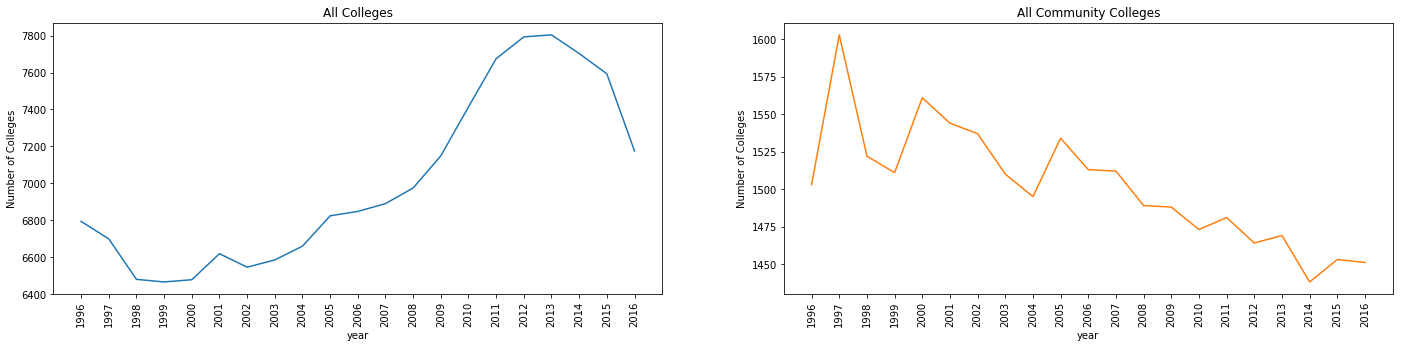

In [5]:
# Create 2 subplots ('All Colleges', 'All Community Colleges')
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(24, 5))
college_enrollment_df.plot(
    x='year', 
    y=['total_colleges', 'total_community_colleges'],
    xticks=college_enrollment_df['year'].values,
    legend=False,
    rot=90,
    ax=ax,
    subplots=True
)

# Add title to each subplot
ax[0].set_title('All Colleges')
ax[1].set_title('All Community Colleges')

# Add y label to each subplot
for i in range(2):
    ax[i].set_ylabel('Number of Colleges')

plt.show()

### How has college enrollments changed over time?

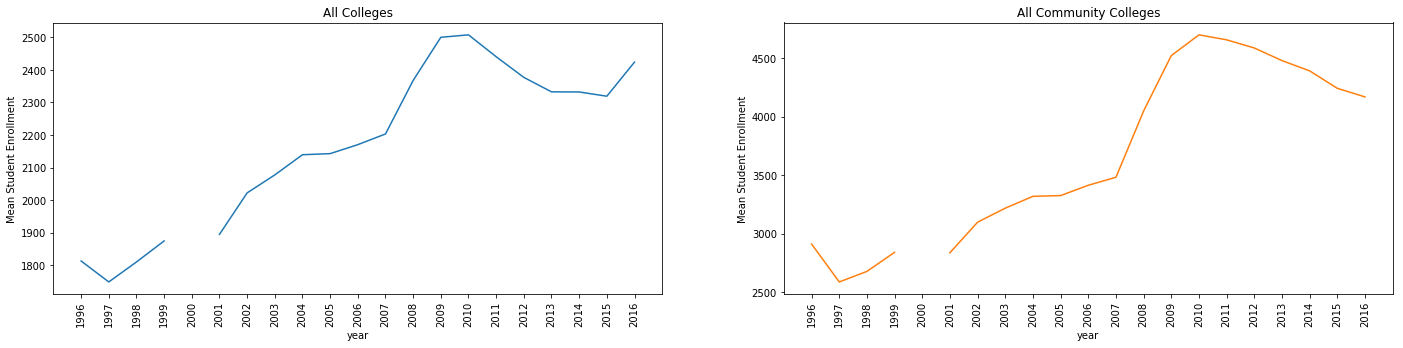

In [6]:
# Create 2 subplots ('All Colleges', 'All Community Colleges')
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(24, 5))
college_enrollment_df.plot(
    x='year', 
    y=['mean_college_enrollment', 'mean_community_college_enrollment'],
    xticks=college_enrollment_df['year'].values,
    legend=False,
    rot=90,
    ax=ax,
    subplots=True
)

# Add title to each subplot
ax[0].set_title('All Colleges')
ax[1].set_title('All Community Colleges')

# Add y label to each subplot
for i in range(2):
    ax[i].set_ylabel('Mean Student Enrollment')

plt.show()

### How has college entry age changed over time?

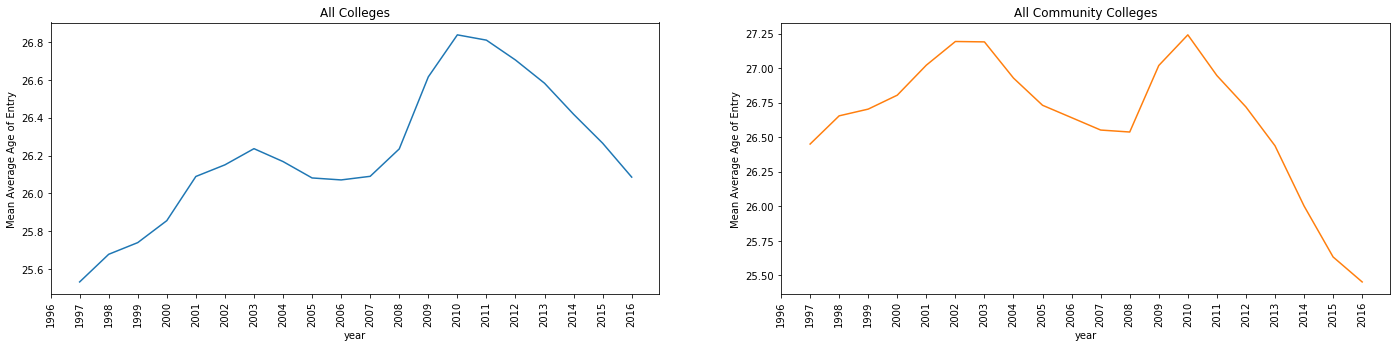

In [7]:
# Create 2 subplots ('All Colleges', 'All Community Colleges')
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(24, 5))
college_enrollment_df.plot(
    x='year', 
    y=['mean_average_age_of_entry_all_colleges', 'mean_average_age_of_entry_community_colleges'],
    xticks=college_enrollment_df['year'].values,
    legend=False,
    rot=90,
    ax=ax,
    subplots=True
)

# Add title to each subplot
ax[0].set_title('All Colleges')
ax[1].set_title('All Community Colleges')

# Add y label to each subplot
for i in range(2):
    ax[i].set_ylabel('Mean Average Age of Entry')

plt.show()

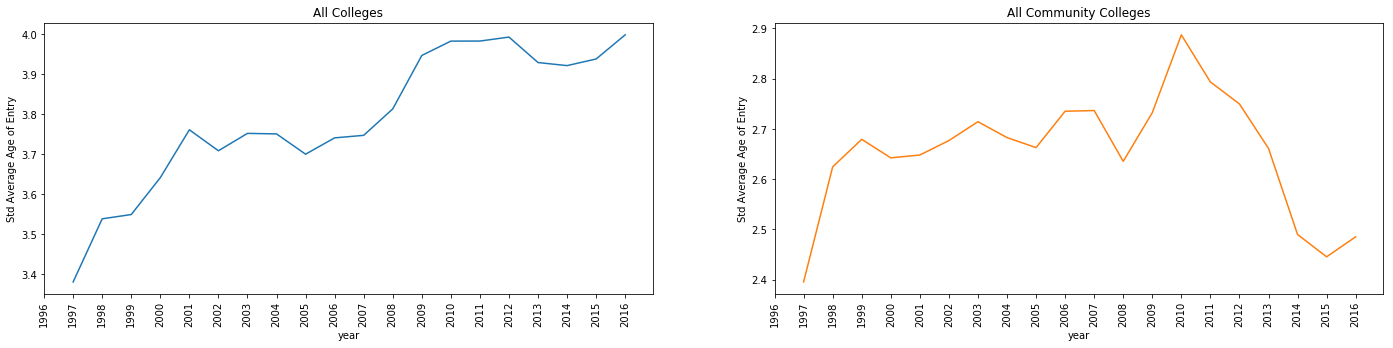

In [8]:
# Create 2 subplots ('All Colleges', 'All Community Colleges')
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(24, 5))
college_enrollment_df.plot(
    x='year', 
    y=['std_average_age_of_entry_all_colleges', 'std_average_age_of_entry_community_colleges'],
    xticks=college_enrollment_df['year'].values,
    legend=False,
    rot=90,
    ax=ax,
    subplots=True
)

# Add title to each subplot
ax[0].set_title('All Colleges')
ax[1].set_title('All Community Colleges')

# Add y label to each subplot
for i in range(2):
    ax[i].set_ylabel('Std Average Age of Entry')

plt.show()

### Are more students taking courses part-time?

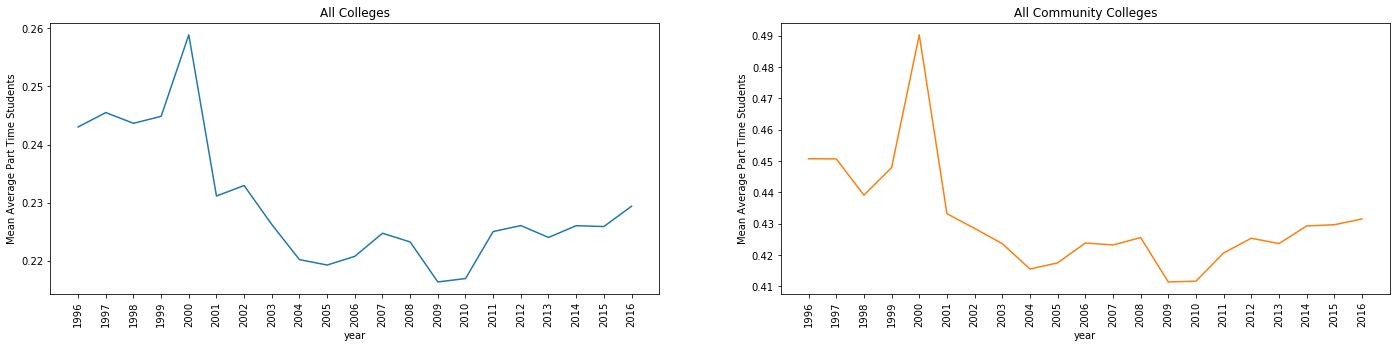

In [9]:
# Create 2 subplots ('All Colleges', 'All Community Colleges')
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(24, 5))
college_enrollment_df.plot(
    x='year', 
    y=['mean_average_part_time_students_all_colleges', 'mean_average_part_time_students_community_colleges'],
    xticks=college_enrollment_df['year'].values,
    legend=False,
    rot=90,
    ax=ax,
    subplots=True
)

# Add title to each subplot
ax[0].set_title('All Colleges')
ax[1].set_title('All Community Colleges')

# Add y label to each subplot
for i in range(2):
    ax[i].set_ylabel('Mean Average Part Time Students')

plt.show()

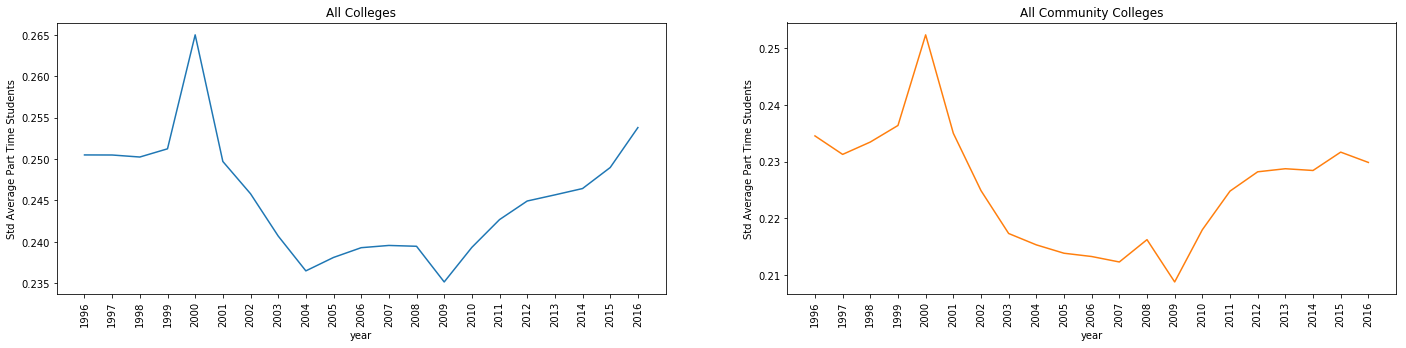

In [10]:
# Create 2 subplots ('All Colleges', 'All Community Colleges')
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(24, 5))
college_enrollment_df.plot(
    x='year', 
    y=['std_average_part_time_students_all_colleges', 'std_average_part_time_students_community_colleges'],
    xticks=college_enrollment_df['year'].values,
    legend=False,
    rot=90,
    ax=ax,
    subplots=True
)

# Add title to each subplot
ax[0].set_title('All Colleges')
ax[1].set_title('All Community Colleges')

# Add y label to each subplot
for i in range(2):
    ax[i].set_ylabel('Std Average Part Time Students')

plt.show()

# Polish Visualizations

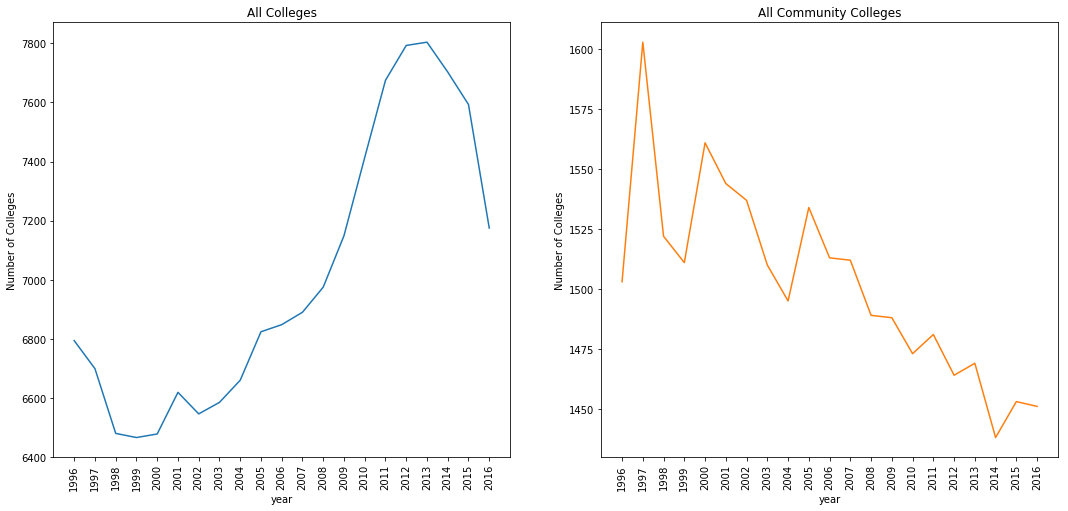

In [11]:
# Create 2 subplots ('All Colleges', 'Community Colleges')
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18, 8))
college_enrollment_df.plot(
    x='year', 
    y=['total_colleges', 'total_community_colleges'],
    xticks=college_enrollment_df['year'].values,
    legend=False,
    rot=90,
    ax=ax,
    subplots=True
)

# Add title to each subplot
ax[0].set_title('All Colleges')
ax[1].set_title('All Community Colleges')

# Add y label to each subplot
for i in range(2):
    ax[i].set_ylabel('Number of Colleges')

plt.show()

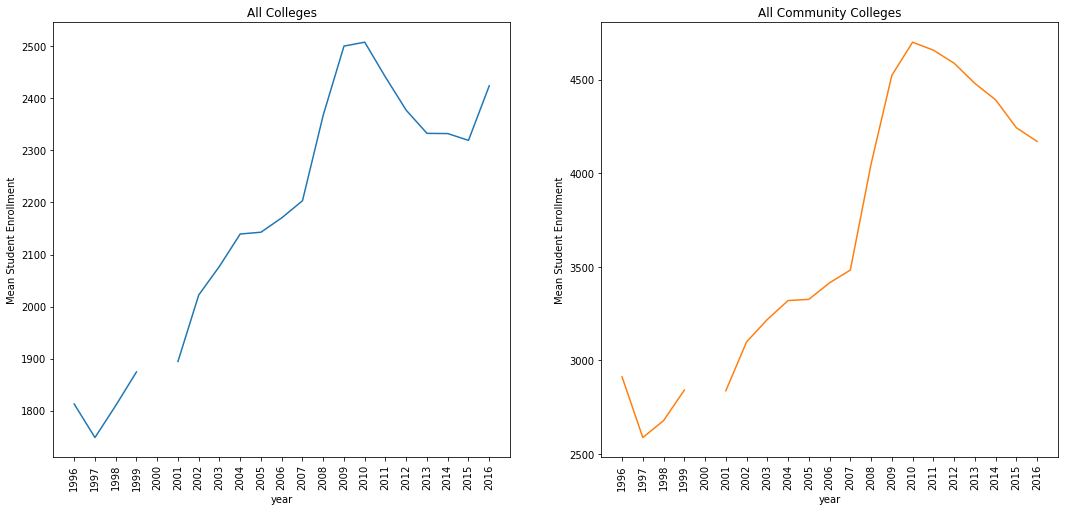

In [12]:
# Create 2 subplots ('All Colleges', 'All Community Colleges')
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18, 8))
college_enrollment_df.plot(
    x='year', 
    y=['mean_college_enrollment', 'mean_community_college_enrollment',],
    xticks=college_enrollment_df['year'].values,
    legend=False,
    rot=90,
    ax=ax,
    subplots=True
)

# Add title to each subplot
ax[0].set_title('All Colleges')
ax[1].set_title('All Community Colleges')

# Add y label to each subplot
for i in range(2):
    ax[i].set_ylabel('Mean Student Enrollment')

plt.show()

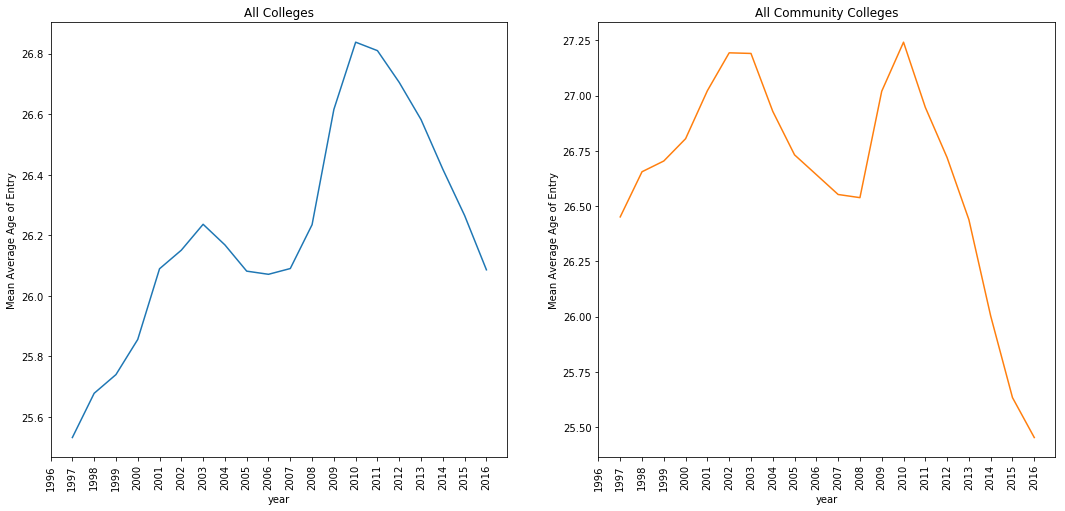

In [13]:
# Create 2 subplots ('All Colleges', 'All Community Colleges')
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18, 8))
college_enrollment_df.plot(
    x='year', 
    y=['mean_average_age_of_entry_all_colleges', 'mean_average_age_of_entry_community_colleges'],
    xticks=college_enrollment_df['year'].values,
    legend=False,
    rot=90,
    ax=ax,
    subplots=True
)

# Add title to each subplot
ax[0].set_title('All Colleges')
ax[1].set_title('All Community Colleges')

# Add y label to each subplot
for i in range(2):
    ax[i].set_ylabel('Mean Average Age of Entry')

plt.show()

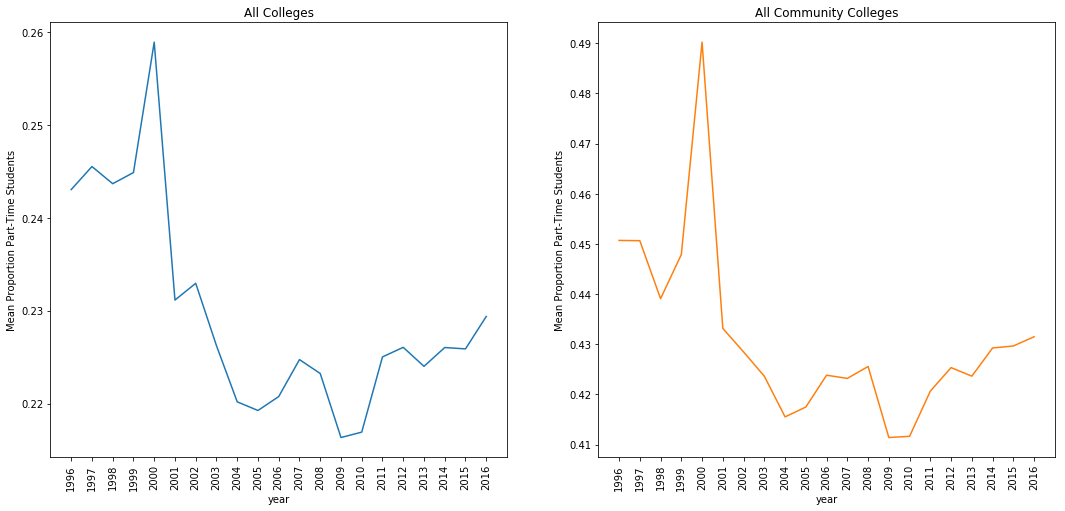

In [14]:
# Create 2 subplots ('All Colleges', 'All Community Colleges')
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18, 8))
college_enrollment_df.plot(
    x='year', 
    y=['mean_average_part_time_students_all_colleges', 'mean_average_part_time_students_community_colleges'],
    xticks=college_enrollment_df['year'].values,
    legend=False,
    rot=90,
    ax=ax,
    subplots=True
)

# Add title to each subplot
ax[0].set_title('All Colleges')
ax[1].set_title('All Community Colleges')

# Add y label to each subplot
for i in range(2):
    ax[i].set_ylabel('Mean Proportion Part-Time Students')

plt.show()